# So far: 532nm with $180\alpha_0$. Now investigate different polarisabilities:

### Start with $408\alpha_0$ (theoretical result from Igors paper)

In [61]:
from helpers_clean import *

initial_power = 10 * si.uW 
initial_grad = 1 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 1.1 * si.um,
    a=408*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

979.2727155613634Hz
0.482874417633589 uK


<IPython.core.display.Math object>

100%|██████████| 100/100 [01:00<00:00,  1.64it/s]


0.6209840778664553

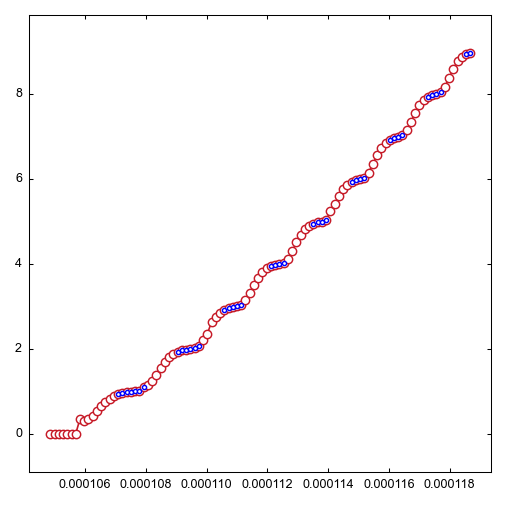

In [39]:
powers, atom_number = sweep_power(trap, 4*si.G/si.cm, 100, -0.*zr, 1.1*zr,n_plotpoints=100)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

In [40]:
4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * -1*si.G/si.cm) * trap.subs(trap.waist_tweezer**2/trap.a)

2.88723965552054e-5

100%|██████████| 100/100 [00:53<00:00,  1.86it/s]


0.048702907855759286

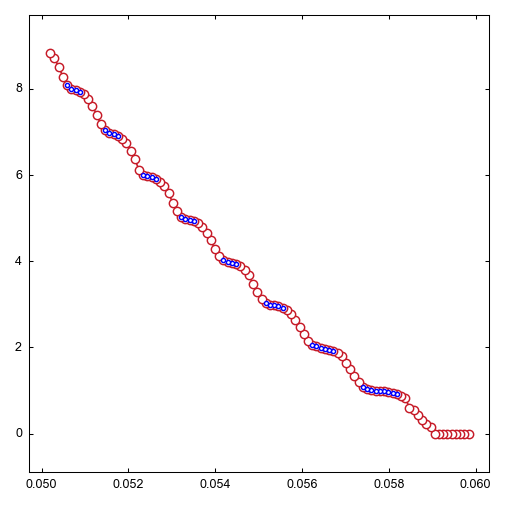

In [41]:
gradients, atom_number = sweep_gradient(trap, 135*si.uW, 50, -0.*zr, 1.1*zr,n_plotpoints=100)

calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm

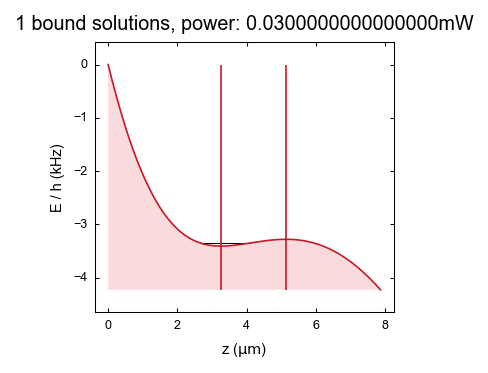

In [42]:
trap[trap.power_tweezer] = 30*si.uW
trap[trap.grad_z] = -1*si.G/si.cm
plot_solutions(trap,100,-0.*zr,1.1*zr,display_plot=-2)

In [43]:
zr

7.145351712112123e-06

  4%|▍         | 1/25 [02:57<1:11:01, 177.58s/it]

For -2.5G/cm (6.078304039223683uW): dB'=0.009000420875420873G/cm (rel: 0.3600168350168349%), dP = 0.17496762501461213uW (rel: 2.878559938521254%)


  8%|▊         | 2/25 [05:48<1:06:33, 173.63s/it]

For -1.9791666666666665G/cm (13.992919496161797uW): dB'=0.013497828429260821G/cm (rel: 0.6819955416889678%), dP = 0.239409392395256uW (rel: 1.7109323930643998%)


 12%|█▏        | 3/25 [08:38<1:03:01, 171.89s/it]

For -1.4583333333333335G/cm (21.90753495309991uW): dB'=0.015687466665357818G/cm (rel: 1.0757119999102505%), dP = 0.2795151345972899uW (rel: 1.2758858319554505%)


 16%|█▌        | 4/25 [11:24<59:20, 169.54s/it]  

For -0.9374999999999999G/cm (29.82215041003802uW): dB'=0.017023775314723592G/cm (rel: 1.8158693669038501%), dP = 0.3225161588198536uW (rel: 1.0814651337527152%)


 20%|██        | 5/25 [14:07<55:48, 167.43s/it]

For -0.4166666666666665G/cm (37.736765866976135uW): dB'=0.023166619808410862G/cm (rel: 5.559988754018609%), dP = 0.38214545167656433uW (rel: 1.0126608438668139%)


 24%|██▍       | 6/25 [16:56<53:11, 167.97s/it]

For 0.10416666666666696G/cm (45.651381323914244uW): dB'=0.02371522099299877G/cm (rel: 22.766612153278757%), dP = 0.4336523036619667uW (rel: 0.9499215381568317%)


 28%|██▊       | 7/25 [19:44<50:21, 167.86s/it]

For 0.625G/cm (53.56599678085235uW): dB'=0.025861525438610308G/cm (rel: 4.137844070177649%), dP = 0.46913859766994714uW (rel: 0.8758141841162282%)


 32%|███▏      | 8/25 [22:31<47:26, 167.44s/it]

For 1.1458333333333337G/cm (61.480612237790474uW): dB'=0.028525570073854017G/cm (rel: 2.489504297354532%), dP = 0.5027965898468174uW (rel: 0.817813244770783%)


 36%|███▌      | 9/25 [25:16<44:27, 166.72s/it]

For 1.666666666666667G/cm (69.39522769472858uW): dB'=0.031042324072129982G/cm (rel: 1.8625394443277987%), dP = 0.5322734649830823uW (rel: 0.767017391058312%)


 40%|████      | 10/25 [28:04<41:47, 167.16s/it]

For 2.1874999999999996G/cm (77.30984315166668uW): dB'=0.03382596515103224G/cm (rel: 1.5463298354757598%), dP = 0.5746470463663551uW (rel: 0.7433038574907089%)


 44%|████▍     | 11/25 [30:44<38:29, 164.99s/it]

For 2.708333333333334G/cm (85.22445860860482uW): dB'=0.03618458029271705G/cm (rel: 1.3360460415772446%), dP = 0.6082268163345592uW (rel: 0.7136763627069245%)


 48%|████▊     | 12/25 [33:30<35:47, 165.17s/it]

For 3.229166666666667G/cm (93.1390740655429uW): dB'=0.03701601704426566G/cm (rel: 1.1463024633062913%), dP = 0.5864578418341457uW (rel: 0.6296582263867574%)


 52%|█████▏    | 13/25 [36:17<33:10, 165.84s/it]

For 3.7499999999999996G/cm (101.05368952248101uW): dB'=0.038554561746371445G/cm (rel: 1.0281216465699052%), dP = 0.6753710112124398uW (rel: 0.6683288996214163%)


 56%|█████▌    | 14/25 [39:03<30:26, 166.04s/it]

For 4.270833333333334G/cm (108.96830497941914uW): dB'=0.04175883638942361G/cm (rel: 0.9777678764352845%), dP = 0.7031540296876457uW (rel: 0.6452830754965405%)


 60%|██████    | 15/25 [41:48<27:35, 165.54s/it]

For 4.791666666666667G/cm (116.88292043635725uW): dB'=0.04644944053045998G/cm (rel: 0.9693796284617735%), dP = 0.7593796763473556uW (rel: 0.6496925928205549%)


 64%|██████▍   | 16/25 [44:32<24:45, 165.08s/it]

For 5.312500000000001G/cm (124.79753589329538uW): dB'=0.05046062067528051G/cm (rel: 0.9498469774170447%), dP = 0.732447774989223uW (rel: 0.5869088437895775%)


 68%|██████▊   | 17/25 [47:21<22:10, 166.30s/it]

For 5.833333333333334G/cm (132.71215135023348uW): dB'=0.04655961561052241G/cm (rel: 0.798164839037527%), dP = 0.7366986685324615uW (rel: 0.5551101847398131%)


 72%|███████▏  | 18/25 [50:07<19:23, 166.27s/it]

For 6.354166666666668G/cm (140.62676680717155uW): dB'=0.046699302105619234G/cm (rel: 0.7349398364163027%), dP = 0.8124759987034786uW (rel: 0.5777534513166698%)


 76%|███████▌  | 19/25 [52:53<16:36, 166.14s/it]

For 6.875G/cm (148.5413822641097uW): dB'=0.05037634970393593G/cm (rel: 0.7327469047845225%), dP = 0.7573339191256605uW (rel: 0.5098470928317503%)


 80%|████████  | 20/25 [55:38<13:48, 165.76s/it]

For 7.395833333333333G/cm (156.4559977210478uW): dB'=0.04929882261673333G/cm (rel: 0.6665756297473803%), dP = 0.7556132646069439uW (rel: 0.4829557675086126%)


 84%|████████▍ | 21/25 [58:23<11:01, 165.44s/it]

For 7.916666666666669G/cm (164.37061317798597uW): dB'=0.05296457430108838G/cm (rel: 0.6690262016979582%), dP = 0.8011650858763456uW (rel: 0.48741382074715356%)


 88%|████████▊ | 22/25 [1:01:08<08:16, 165.59s/it]

For 8.437499999999998G/cm (172.285228634924uW): dB'=0.05526617019451412G/cm (rel: 0.6550064615646118%), dP = 0.9027226666328872uW (rel: 0.5239698573031908%)


 92%|█████████▏| 23/25 [1:03:56<05:32, 166.04s/it]

For 8.958333333333336G/cm (180.19984409186213uW): dB'=0.05932565233328072G/cm (rel: 0.6622398399994126%), dP = 0.9222348923219892uW (rel: 0.5117845117845125%)


 96%|█████████▌| 24/25 [1:06:43<02:46, 166.34s/it]

For 9.479166666666668G/cm (188.11445954880028uW): dB'=0.05943565444407201G/cm (rel: 0.6270134974319684%), dP = 0.8643801666730384uW (rel: 0.45949693008516584%)


100%|██████████| 25/25 [1:09:30<00:00, 166.83s/it]

For 10.0G/cm (196.02907500573835uW): dB'=0.05771730261856986G/cm (rel: 0.5771730261856985%), dP = 0.9232662712688557uW (rel: 0.47098435333729394%)


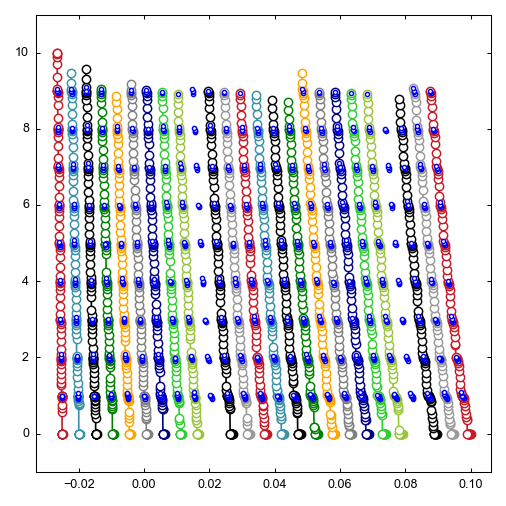

In [44]:
n_plotpoints = 100

many_grad = np.linspace(-2.5,10,25)*si.G/si.cm
many_power = np.zeros_like(many_grad)
step_grad = np.zeros_like(many_grad)
step_power = np.zeros_like(many_grad)

data = {"gradient":np.zeros_like(many_grad),
       "power":np.zeros_like(many_grad),
       "gradient_step":np.zeros_like(many_grad),
       "power_step":np.zeros_like(many_grad),
       "gradient_rel":np.zeros_like(many_grad),
       "power_rel":np.zeros_like(many_grad)
       }

for i in tqdm(range(len(many_grad))):
    initial_grad = many_grad[i]
    #print(i)
    many_power[i] = 4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * initial_grad) * trap.subs(trap.waist_tweezer**2/trap.a)

    gradients, atom_number = sweep_gradient(trap, many_power[i], 250, -0.*zr, 1.1*zr,n_plotpoints=n_plotpoints)
    step_grad[i] = calculate_stepsize(gradients,atom_number,plot=True)

    powers, atom_number = sweep_power(trap, initial_grad, 250, -0.*zr, 1.1*zr,n_plotpoints=n_plotpoints)
    step_power[i] = calculate_stepsize(powers,atom_number)

    print(f"For {initial_grad/si.G*si.cm}G/cm ({many_power[i]/si.uW}uW): dB'={step_grad[i]/si.G*si.cm}G/cm (rel: {step_grad[i]/np.abs(initial_grad)*100}%), dP = {step_power[i]/si.uW}uW (rel: {step_power[i]/many_power[i]*100}%)")

    data["gradient"][i] = initial_grad
    data["power"][i] = many_power[i]
    data["gradient_step"][i] = step_grad[i]
    data["gradient_rel"][i] = step_grad[i]/np.abs(initial_grad)
    data["power_step"][i] = step_power[i]
    data["power_rel"][i] = step_power[i]/many_power[i]


# Save dictionary to numpy file
np.savez("sweeps_532_alpha408.npz",gradient=data["gradient"], power = data["power"],gradient_step = data["gradient_step"],gradient_rel = data["gradient_rel"],power_step = data["power_step"],power_rel = data["power_rel"])

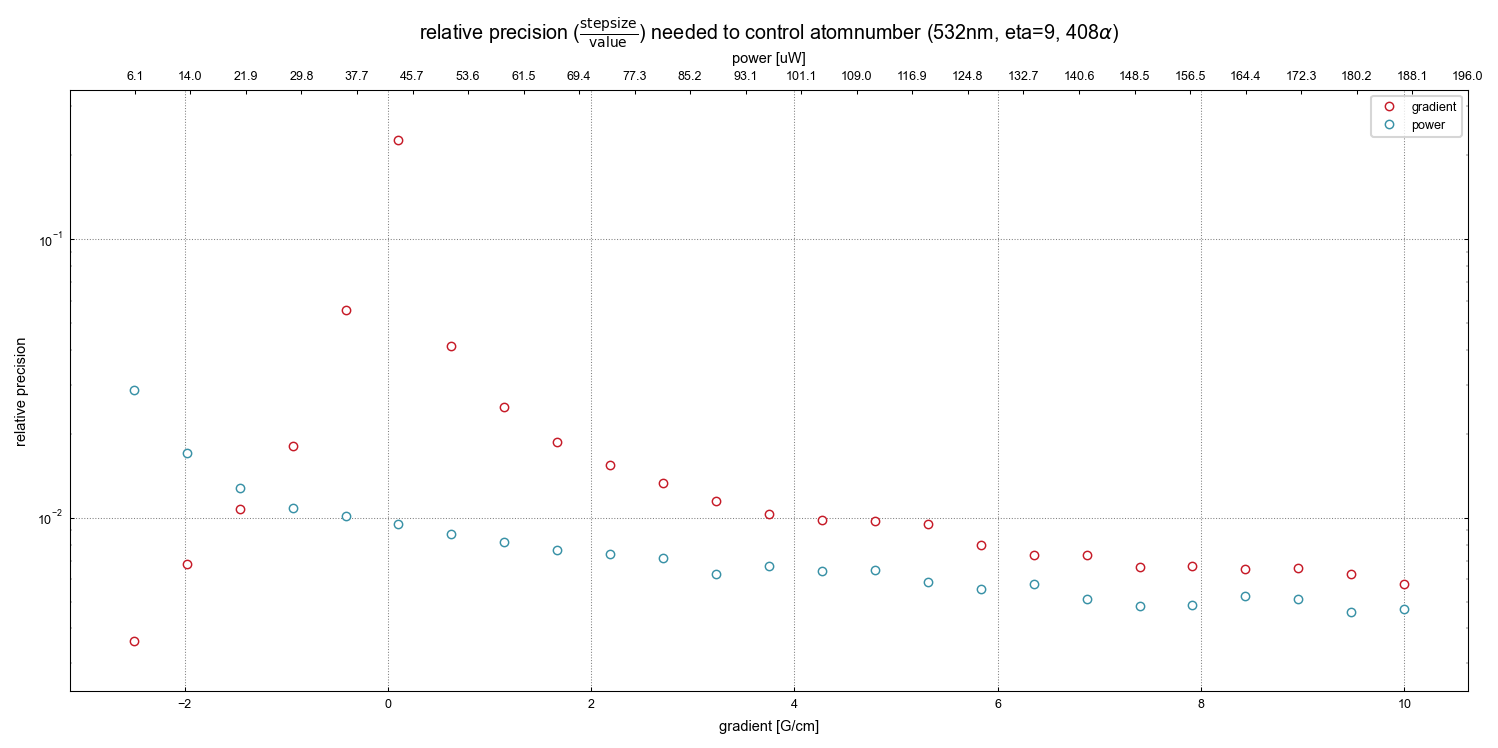

In [45]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.set_yscale("log")
ax1.plot(data["gradient"]/si.G*si.cm,data["gradient_rel"],"o",label="gradient")
ax1.plot(data["gradient"]/si.G*si.cm,data["power_rel"],"o",label="power")

ax1.set_title(r"relative precision ($\frac{\text{stepsize}}{\text{value}}$) needed to control atomnumber (532nm, eta=9, 408$\alpha$)")
ax1.set_xlabel("gradient [G/cm]")
ax1.set_ylabel("relative precision")

new_tick_locations = data["power"]/si.uW

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(new_tick_locations)
ax2.set_xlabel(r"power [uW]")

ax1.legend()
ax1.grid()
plt.show()

## Try the same with $50\alpha_0$:

In [53]:
from helpers_clean import *

initial_power = 350 * si.uW 
initial_grad = 6 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 1.1 * si.um,
    a=50*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

2028.1150937249367Hz
2.07115252661466 uK


<IPython.core.display.Math object>

  4%|▍         | 1/25 [02:57<1:11:05, 177.73s/it]

For -2.5G/cm (49.59896096006525uW): dB'=0.009000420875420873G/cm (rel: 0.3600168350168349%), dP = 1.427735820119235uW (rel: 2.878559938521254%)


  8%|▊         | 2/25 [05:51<1:07:10, 175.26s/it]

For -1.9791666666666665G/cm (114.18222308868025uW): dB'=0.0134978284292608G/cm (rel: 0.6819955416889668%), dP = 1.9535806419452895uW (rel: 1.7109323930644005%)


 12%|█▏        | 3/25 [08:41<1:03:23, 172.91s/it]

For -1.4583333333333335G/cm (178.7654852172952uW): dB'=0.015687466665357818G/cm (rel: 1.0757119999102505%), dP = 2.280843498313885uW (rel: 1.275885831955451%)


 16%|█▌        | 4/25 [11:27<59:37, 170.37s/it]  

For -0.9374999999999999G/cm (243.3487473459102uW): dB'=0.017023775314723592G/cm (rel: 1.8158693669038501%), dP = 2.631731855970006uW (rel: 1.0814651337527157%)


 20%|██        | 5/25 [14:12<56:07, 168.37s/it]

For -0.4166666666666665G/cm (307.9320094745252uW): dB'=0.023166619808410862G/cm (rel: 5.559988754018609%), dP = 3.118306885680766uW (rel: 1.0126608438668145%)


 24%|██▍       | 6/25 [17:02<53:29, 168.93s/it]

For 0.10416666666666696G/cm (372.51527160314015uW): dB'=0.02371522099299877G/cm (rel: 22.766612153278757%), dP = 3.5386027978816506uW (rel: 0.9499215381568324%)


 28%|██▊       | 7/25 [19:51<50:38, 168.78s/it]

For 0.625G/cm (437.09853373175514uW): dB'=0.025861525438610308G/cm (rel: 4.137844070177649%), dP = 3.8281709569867632uW (rel: 0.8758141841162272%)


 32%|███▏      | 8/25 [22:39<47:46, 168.63s/it]

For 1.1458333333333337G/cm (501.6817958603702uW): dB'=0.028525570073854017G/cm (rel: 2.489504297354532%), dP = 4.10282017315003uW (rel: 0.8178132447707832%)


 36%|███▌      | 9/25 [25:24<44:39, 167.49s/it]

For 1.666666666666667G/cm (566.2650579889851uW): dB'=0.031042324072129982G/cm (rel: 1.8625394443277987%), dP = 4.343351474261947uW (rel: 0.7670173910583113%)


 40%|████      | 10/25 [28:13<42:01, 168.08s/it]

For 2.1874999999999996G/cm (630.8483201176uW): dB'=0.03382596515103224G/cm (rel: 1.5463298354757598%), dP = 4.689119898349459uW (rel: 0.7433038574907092%)


 44%|████▍     | 11/25 [30:54<38:41, 165.83s/it]

For 2.708333333333334G/cm (695.4315822462152uW): dB'=0.03618458029271705G/cm (rel: 1.3360460415772446%), dP = 4.963130821290001uW (rel: 0.7136763627069242%)


 48%|████▊     | 12/25 [33:40<35:57, 165.96s/it]

For 3.229166666666667G/cm (760.01484437483uW): dB'=0.037016017044265624G/cm (rel: 1.1463024633062904%), dP = 4.7854959893666305uW (rel: 0.6296582263867576%)


 52%|█████▏    | 13/25 [36:29<33:20, 166.73s/it]

For 3.7499999999999996G/cm (824.5981065034449uW): dB'=0.038554561746371445G/cm (rel: 1.0281216465699052%), dP = 5.511027451493509uW (rel: 0.6683288996214164%)


 56%|█████▌    | 14/25 [39:15<30:33, 166.71s/it]

For 4.270833333333334G/cm (889.1813686320601uW): dB'=0.04175883638942361G/cm (rel: 0.9777678764352845%), dP = 5.737736882251181uW (rel: 0.6452830754965396%)


 60%|██████    | 15/25 [42:02<27:45, 166.58s/it]

For 4.791666666666667G/cm (953.7646307606749uW): dB'=0.04644944053045998G/cm (rel: 0.9693796284617735%), dP = 6.196538158994412uW (rel: 0.6496925928205539%)


 64%|██████▍   | 16/25 [44:47<24:54, 166.11s/it]

For 5.312500000000001G/cm (1018.34789288929uW): dB'=0.05046062067528051G/cm (rel: 0.9498469774170447%), dP = 5.976773843912057uW (rel: 0.5869088437895775%)


 68%|██████▊   | 17/25 [47:36<22:17, 167.13s/it]

For 5.833333333333334G/cm (1082.931155017905uW): dB'=0.046559615610522326G/cm (rel: 0.7981648390375256%), dP = 6.0114611352248986uW (rel: 0.5551101847398144%)


 72%|███████▏  | 18/25 [50:24<19:30, 167.15s/it]

For 6.354166666666668G/cm (1147.51441714652uW): dB'=0.046699302105619234G/cm (rel: 0.7349398364163027%), dP = 6.629804149420387uW (rel: 0.5777534513166699%)


 76%|███████▌  | 19/25 [53:10<16:41, 166.98s/it]

For 6.875G/cm (1212.097679275135uW): dB'=0.05037634970393593G/cm (rel: 0.7327469047845225%), dP = 6.1798447800653955uW (rel: 0.5098470928317509%)


 80%|████████  | 20/25 [55:56<13:52, 166.59s/it]

For 7.395833333333333G/cm (1276.6809414037498uW): dB'=0.04929882261673321G/cm (rel: 0.6665756297473786%), dP = 6.165804239192664uW (rel: 0.4829557675086129%)


 84%|████████▍ | 21/25 [58:41<11:04, 166.23s/it]

For 7.916666666666669G/cm (1341.2642035323652uW): dB'=0.05296457430108824G/cm (rel: 0.6690262016979565%), dP = 6.537507100750992uW (rel: 0.4874138207471545%)


 88%|████████▊ | 22/25 [1:01:27<08:18, 166.07s/it]

For 8.437499999999998G/cm (1405.8474656609797uW): dB'=0.05526617019451412G/cm (rel: 0.6550064615646118%), dP = 7.36621695972435uW (rel: 0.5239698573031901%)


 92%|█████████▏| 23/25 [1:04:15<05:33, 166.76s/it]

For 8.958333333333336G/cm (1470.4307277895948uW): dB'=0.05932565233328072G/cm (rel: 0.6622398399994126%), dP = 7.525436721347418uW (rel: 0.5117845117845116%)


 96%|█████████▌| 24/25 [1:07:03<02:47, 167.14s/it]

For 9.479166666666668G/cm (1535.01398991821uW): dB'=0.05943565444407201G/cm (rel: 0.6270134974319684%), dP = 7.053342160051985uW (rel: 0.45949693008516534%)


100%|██████████| 25/25 [1:09:54<00:00, 167.77s/it]

For 10.0G/cm (1599.5972520468247uW): dB'=0.05771730261856986G/cm (rel: 0.5771730261856985%), dP = 7.533852773553869uW (rel: 0.4709843533372945%)


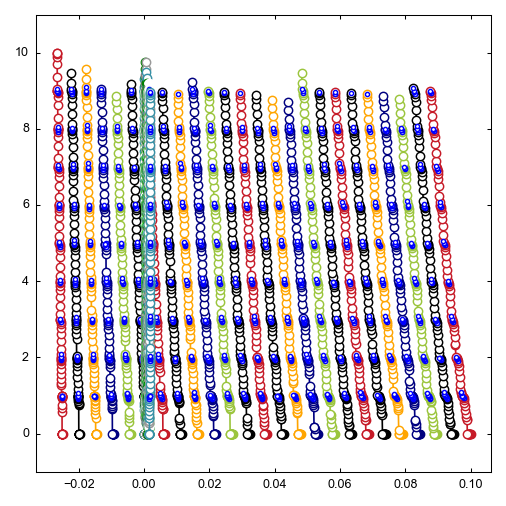

In [57]:
n_plotpoints = 100

many_grad = np.linspace(-2.5,10,25)*si.G/si.cm
many_power = np.zeros_like(many_grad)
step_grad = np.zeros_like(many_grad)
step_power = np.zeros_like(many_grad)

data = {"gradient":np.zeros_like(many_grad),
       "power":np.zeros_like(many_grad),
       "gradient_step":np.zeros_like(many_grad),
       "power_step":np.zeros_like(many_grad),
       "gradient_rel":np.zeros_like(many_grad),
       "power_rel":np.zeros_like(many_grad)
       }

for i in tqdm(range(len(many_grad))):
    initial_grad = many_grad[i]
    #print(i)
    many_power[i] = 4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * initial_grad) * trap.subs(trap.waist_tweezer**2/trap.a)

    gradients, atom_number = sweep_gradient(trap, many_power[i], 250, -0.*zr, 1.1*zr,n_plotpoints=n_plotpoints)
    step_grad[i] = calculate_stepsize(gradients,atom_number,plot=True)

    powers, atom_number = sweep_power(trap, initial_grad, 250, -0.*zr, 1.1*zr,n_plotpoints=n_plotpoints)
    step_power[i] = calculate_stepsize(powers,atom_number,plot=True)

    print(f"For {initial_grad/si.G*si.cm}G/cm ({many_power[i]/si.uW}uW): dB'={step_grad[i]/si.G*si.cm}G/cm (rel: {step_grad[i]/np.abs(initial_grad)*100}%), dP = {step_power[i]/si.uW}uW (rel: {step_power[i]/many_power[i]*100}%)")

    data["gradient"][i] = initial_grad
    data["power"][i] = many_power[i]
    data["gradient_step"][i] = step_grad[i]
    data["gradient_rel"][i] = step_grad[i]/np.abs(initial_grad)
    data["power_step"][i] = step_power[i]
    data["power_rel"][i] = step_power[i]/many_power[i]


# Save dictionary to numpy file
np.savez("sweeps_532_alpha50.npz",gradient=data["gradient"], power = data["power"],gradient_step = data["gradient_step"],gradient_rel = data["gradient_rel"],power_step = data["power_step"],power_rel = data["power_rel"])

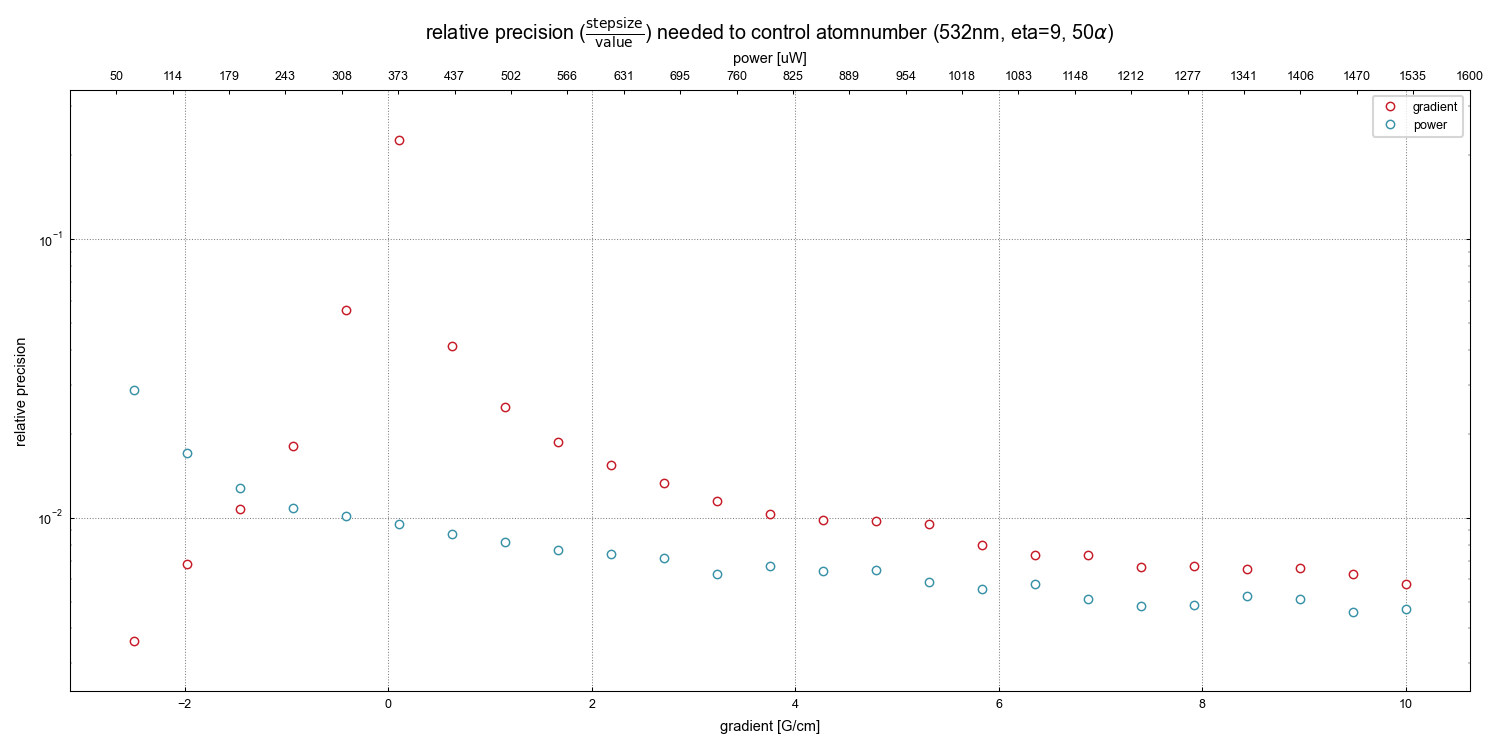

In [59]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.set_yscale("log")
ax1.plot(data["gradient"]/si.G*si.cm,data["gradient_rel"],"o",label="gradient")
ax1.plot(data["gradient"]/si.G*si.cm,data["power_rel"],"o",label="power")

ax1.set_title(r"relative precision ($\frac{\text{stepsize}}{\text{value}}$) needed to control atomnumber (532nm, eta=9, 50$\alpha$)")
ax1.set_xlabel("gradient [G/cm]")
ax1.set_ylabel("relative precision")

new_tick_locations = data["power"]/si.uW

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(new_tick_locations)
ax2.set_xlabel(r"power [uW]")

ax1.legend()
ax1.grid()
plt.show()

--------------

## Try to implement root finding to find power/gradient for max_atoms

In [46]:
trap[trap.grad_z] = 6*si.G/si.cm

def solutions_power(power,n_levels=200):
    trap[trap.power_tweezer] = power
    return plot_solutions(trap,n_levels,-0.5*zr,1.9*zr,plot=False, ret_num=True)

In [47]:
4/3/np.sqrt(3)*zr * np.pi* trap.subs(trap.m * trap.g + trap.mu_b * trap.grad_z) * trap.subs(trap.waist_tweezer**2/trap.a)

0.000135244828296454

In [48]:
solutions_power(135*si.uW*1.2).dtype

dtype('int32')

In [49]:
f = lambda x: solutions_power(x) - 10

root_10 = root_scalar(f,bracket=[135*si.uW,135*si.uW*2]).root

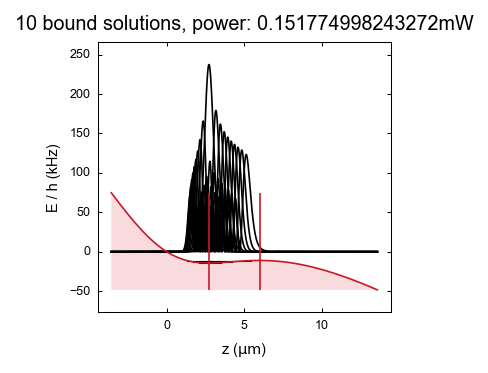

In [50]:
trap[trap.power_tweezer] = root_10
plot_solutions(trap,200,-0.5*zr,1.9*zr)

100%|██████████| 100/100 [01:14<00:00,  1.35it/s]


0.6927697957581859

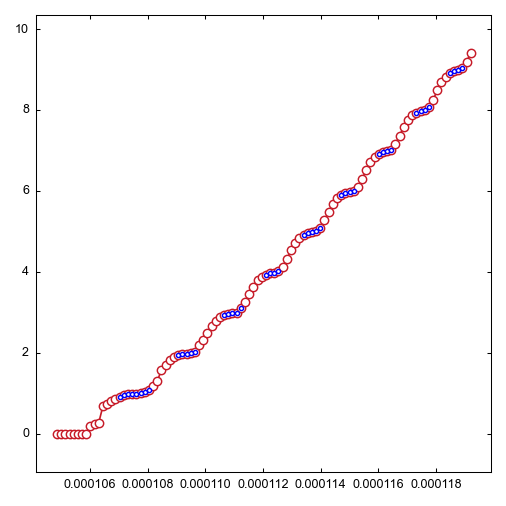

In [51]:
powers, atom_number = sweep_power(trap, 4*si.G/si.cm, 100, -0.5*zr, 1.9*zr,n_plotpoints=100)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

100%|██████████| 100/100 [00:54<00:00,  1.83it/s]


0.07170819152155841

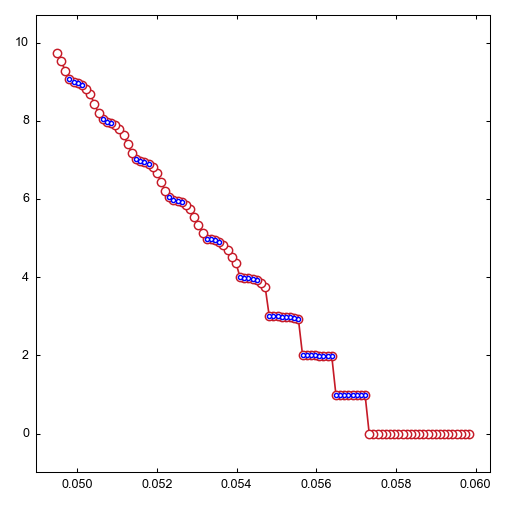

In [52]:
gradients, atom_number = sweep_gradient(trap, 135*si.uW, 50, -0.5*zr, 1.9*zr,n_plotpoints=100)
calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm